In [253]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [254]:
# Determinar la fila donde comienza la data
!head -n 412 high_ray.fld02 | tail -n 10

  0.000      0.000      0.000      0.000      0.000      0.000    
  0.000      0.000      0.000      0.000      0.000      0.000    
  0.000      0.000      0.000      0.000      0.000      0.000    
  0.000      0.000      0.000      0.000      0.000      0.000    
  0.000      0.000      0.000      0.000      0.000      0.000    
  0.000      0.000      0.000      0.000      0.000      0.000    
  0.000      0.000      0.000      0.000      0.000      0.000    
 -1.250000E-01 -1.350000E-01 -5.000000E-01  0.000000E+00  0.000000E+00  0.000000E+00  4.582565E-02  5.000000E-01
 -1.249709E-01 -1.350000E-01 -5.000000E-01  0.000000E+00  0.000000E+00  0.000000E+00  4.582633E-02  4.974386E-01
 -1.249062E-01 -1.350000E-01 -5.000000E-01  0.000000E+00  0.000000E+00  0.000000E+00  4.582755E-02  4.917516E-01


In [256]:
def load_data(file_name,headers):
    data = numpy.loadtxt(fname=file_name,skiprows=headers)
    return data

load_data('high_ray.fld02',409)

array([[-0.125     , -0.135     , -0.5       , ...,  0.        ,
         0.04582565,  0.5       ],
       [-0.1249709 , -0.135     , -0.5       , ...,  0.        ,
         0.04582633,  0.4974386 ],
       [-0.1249062 , -0.135     , -0.5       , ...,  0.        ,
         0.04582755,  0.4917516 ],
       ..., 
       [ 0.1249062 ,  0.135     ,  0.5       , ...,  0.        ,
         0.04582755, -0.4917516 ],
       [ 0.1249709 ,  0.135     ,  0.5       , ...,  0.        ,
         0.04582633, -0.4974386 ],
       [ 0.125     ,  0.135     ,  0.5       , ...,  0.        ,
         0.04582565, -0.5       ]])

In [237]:
# seleccionar la data con x = 0
slice = data[data[:,1] == 0]

In [238]:
mesh_x = slice[:,0]
mesh_z = slice[:,2]
U = slice[:,3]
V = slice[:,4]
W = slice[:,5]
P = slice[:,6]
T = slice[:,7]

In [249]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14

x_ticks = numpy.arange(min(mesh_x), max(mesh_x)+0.0000001, 0.05)
y_ticks = numpy.arange(min(mesh_z), max(mesh_z)+0.0000001, 0.1)

Temp_levels = numpy.arange(min(T)-0.0000001, max(T)+0.0000001, 0.1)

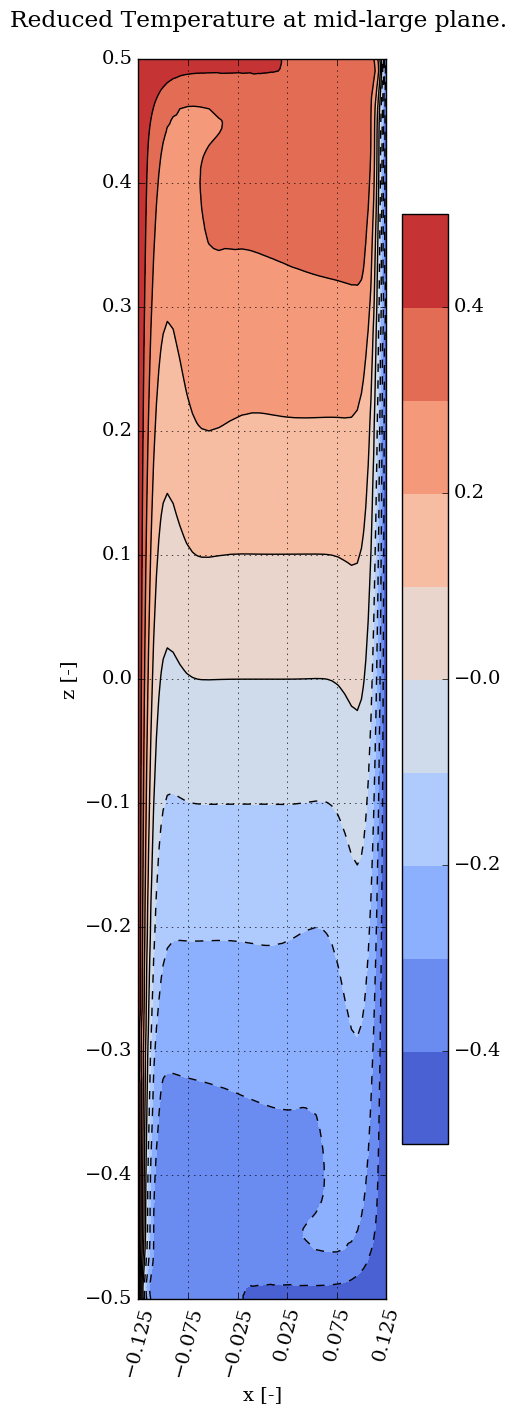

In [252]:
pyplot.figure(figsize=(4,16))
pyplot.title('Reduced Temperature at mid-large plane. \n')
pyplot.xlabel('x [-]')
pyplot.ylabel('z [-]')
pyplot.xlim([min(mesh_x),max(mesh_x)])
pyplot.ylim([min(mesh_z),max(mesh_z)])
pyplot.xticks(x_ticks, rotation=75)
pyplot.yticks(y_ticks)
pyplot.grid()
pyplot.tricontourf(mesh_x[:],mesh_z[:],T[:],
                   levels=Temp_levels,
                   cmap='coolwarm')
pyplot.colorbar()
pyplot.tricontour(mesh_x[:],mesh_z[:],T[:],
                  11,
                  ls='-.',
                  lw=2,
                  colors='black');
pyplot.savefig('Temp.png')